<a href="https://colab.research.google.com/github/trann23/Labs/blob/master/Dating_Reddit_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset
ds = load_dataset("FabianLeibinger/Reddit-Online-Dating-Dataset-RODD")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

rodd.csv:   0%|          | 0.00/348M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/218966 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

df = ds["train"].to_pandas()
df1 = df[['score', 'selftext', 'created']]
df1['created'] = pd.to_datetime(df1['created'])
df1 = df1[df1['created'].dt.year >= 2024]

/tmp/ipython-input-1123895134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created'] = pd.to_datetime(df1['created'])


In [ ]:
df1

,score,selftext,created
12,1,How many of you have experienced someone flaki...,2024-06-04 03:14:20
14,45,I (26F) met a man (33M) here on a different su...,2024-06-10 15:19:01
19,1,So I 18m have been on tinder for a bit. I’ve b...,2024-08-02 08:03:47
23,3,I apologise in advance that this is really lon...,2024-03-24 17:11:13
26,1,So there’s this guy that I go to grad school w...,2024-01-03 03:27:16
...,...,...,...
218939,2,Im a 24 year old male who has never been in a ...,2024-05-11 13:58:31
218943,1,So this is about my boyfriend's ex and I am tr...,2024-02-18 20:05:55
218951,8,"I'm sure most if you must know, especially con...",2024-04-27 12:46:24
218962,1,A friend of mine [30M] was seeing two guys. On...,2024-03-11 01:54:17


In [ ]:
df1['score'].value_counts().sort_index()

,count
score,
0,3715
1,26001
2,5179
3,2068
4,1034
...,...
5471,1
5523,1
5929,1


In [ ]:
df1["score_pct"] = df1["score"].rank(pct=True)

In [ ]:
df1

,score,selftext,created,score_pct
12,1,How many of you have experienced someone flaki...,2024-06-04 03:14:20,0.369782
14,45,I (26F) met a man (33M) here on a different su...,2024-06-10 15:19:01,0.956631
19,1,So I 18m have been on tinder for a bit. I’ve b...,2024-08-02 08:03:47,0.369782
23,3,I apologise in advance that this is really lon...,2024-03-24 17:11:13,0.794813
26,1,So there’s this guy that I go to grad school w...,2024-01-03 03:27:16,0.369782
...,...,...,...,...
218939,2,Im a 24 year old male who has never been in a ...,2024-05-11 13:58:31,0.714655
218943,1,So this is about my boyfriend's ex and I am tr...,2024-02-18 20:05:55,0.369782
218951,8,"I'm sure most if you must know, especially con...",2024-04-27 12:46:24,0.884681
218962,1,A friend of mine [30M] was seeing two guys. On...,2024-03-11 01:54:17,0.369782


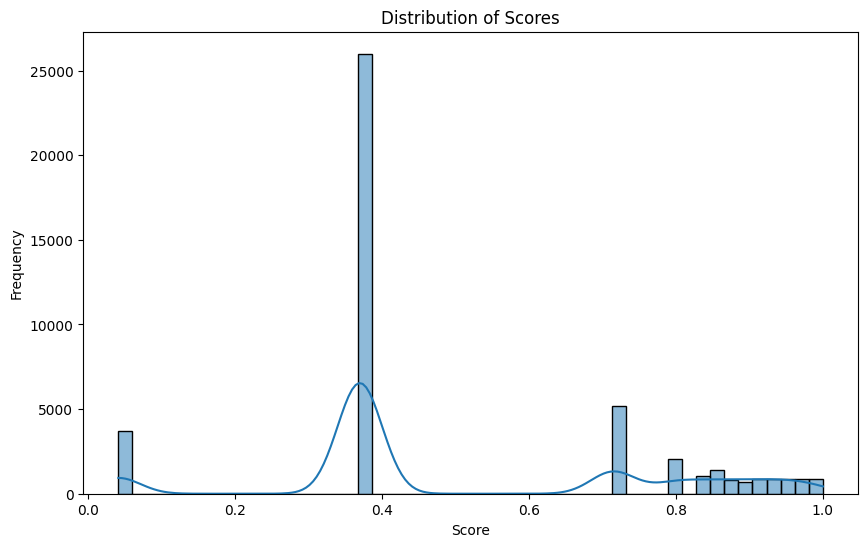

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['score_pct'], bins=50, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df1['score'].quantile(0.70)


np.float64(2.0)

In [ ]:
df1["active"] = df1["score_pct"] > 0.70   # top 70%
df1["active"].value_counts()

,count
active,
False,29695
True,15488


In [ ]:
df1

,score,selftext,created,score_pct
12,1,How many of you have experienced someone flaki...,2024-06-04 03:14:20,0.369782
14,45,I (26F) met a man (33M) here on a different su...,2024-06-10 15:19:01,0.956631
19,1,So I 18m have been on tinder for a bit. I’ve b...,2024-08-02 08:03:47,0.369782
23,3,I apologise in advance that this is really lon...,2024-03-24 17:11:13,0.794813
26,1,So there’s this guy that I go to grad school w...,2024-01-03 03:27:16,0.369782
...,...,...,...,...
218939,2,Im a 24 year old male who has never been in a ...,2024-05-11 13:58:31,0.714655
218943,1,So this is about my boyfriend's ex and I am tr...,2024-02-18 20:05:55,0.369782
218951,8,"I'm sure most if you must know, especially con...",2024-04-27 12:46:24,0.884681
218962,1,A friend of mine [30M] was seeing two guys. On...,2024-03-11 01:54:17,0.369782


In [ ]:
df1.isnull().sum()

,0
score,0
selftext,17
created,0
score_pct,0


In [ ]:
df1 = df1.dropna()
print(df1.isnull().sum())

score        0
selftext     0
created      0
score_pct    0
dtype: int64


In [ ]:
######################################################################
## Step 2: find unique tokens (words)
######################################################################
import re
from collections import Counter, OrderedDict
import tokenizers

def tokenizer(text):
    text = re.sub(r'<[^>]*\_">', '', text)
    emoticons = re.findall(r'\_[:;=][-]?[)(DP]^', text)
    text = (re.sub(r'[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    tokenized = text.split()
    return tokenized

In [ ]:
df1['token_len'] = df1['selftext'].apply(lambda x: len(tokenizer(x)))
df1 = df1[df1['token_len'] > 0].copy()

df1['token_len'] = df1['selftext'].apply(lambda x: len(tokenizer(x)))
empty_rows = df1[df1['token_len'] == 0]
print(empty_rows[['selftext']].head())
print("Number of empty-token texts:", len(empty_rows))

/tmp/ipython-input-1274070447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['token_len'] = df1['selftext'].apply(lambda x: len(tokenizer(x)))


Empty DataFrame
Columns: [selftext]
Index: []
Number of empty-token texts: 0


### **Long Short Term Memory with word embeddings**

In [ ]:
######################################################################
# Step 1: load and create the datasets
######################################################################
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Convert labels to numeric for modeling:
df1['target'] = df1['active'].map({False: 0, True: 1})
print(df1['target'].value_counts())

# Features (text) and labels (numeric)
X1 = df1['selftext'].values
y1 = df1['target'].values

# First split: train + test
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.30, random_state=42
)

# Second split: train + validation (e.g. 20% of training)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)

target
0    29695
1    15488
Name: count, dtype: int64


In [ ]:
token_counts = Counter()

#### Read the training data text and create a dict of all words (with frequencies)
for line in X_train:
    tokens = tokenizer(line)
    token_counts.update(tokens)

print('Vocab-size:', len(token_counts))

#### Create a ordered dictionary from token_counts
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

Vocab-size: 35480


In [ ]:
print(X_train[0])

This year, I have resolved to look for potential partners more in real life. I've realized that online dating/dating apps only work to a limited extent. I do have matches and I've been on dates, which has helped me meet a few women. However, I often have the feeling that I'm meeting the wrong women. I've also tried to sort better, but somehow women (and probably us men too) are different online than offline. So now I have discovered the first person I would like to ask for a date and I have a few questions for the veterans ;). She works at the checkout in the supermarket in the evening. We didn't get beyond the typical small talk at the checkout. I think she's a bit shy and reserved. It seems to me that she is embarrassed to have a private conversation at the checkout. How can I engage her in a charming short conversation and ask her out at the end? Or should I just give her a nice card with a funny saying and my number? I'm not exactly bursting with self-confidence myself, so I'm a bi

In [ ]:
######################################################################
### Define a class to store the unique tokens (words) and to map each unique word to a unique token
######################################################################
from collections import Counter, defaultdict

class Vocab:
    def __init__(self, token_counter, min_freq=1, specials=['<pad>', '<unk>']):

        # Initialize mappings
        self.token_to_idx = {}
        self.idx_to_token = []

        # Add special tokens first
        for token in specials:
            self._add_token(token)
        self.unk_index = self.token_to_idx['<unk>'] if '<unk>' in specials else None

        # Add tokens meeting min_freq
        for token, freq in token_counter.items():
            if freq >= min_freq and token not in self.token_to_idx:
                self._add_token(token)

    def __len__(self):
        return len(self.idx_to_token)

    def _add_token(self, token):
        self.idx_to_token.append(token)
        self.token_to_idx[token] = len(self.idx_to_token) - 1

    def token_to_index(self, token):
        return self.token_to_idx.get(token, self.unk_index)

    def index_to_token(self, index):
        if 0 <= index < len(self.idx_to_token):
            return self.idx_to_token[index]
        return '<unk>'

    def encode(self, tokens):
        return [self.token_to_index(token) for token in tokens]

    def decode(self, indices):
        return [self.index_to_token(index) for index in indices]



In [ ]:
######################################################################
###### create a vocabulary of unique words in the training data set.
######################################################################

vocab = Vocab(ordered_dict, min_freq=1)

if not torch.cuda.is_available():
    print("Warning: this code may be very slow on CPU")

In [ ]:
###########################################################################
## Define a class to Create a joint Torch dataset by combining X and y.
###########################################################################

from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

### Create a joint Torch dataset by combining X_train and y_train.
train_dataset = JointDataset(X_train, y_train)
### Create a joint Torch dataset by combining X_valid and y_valid.
valid_dataset = JointDataset(X_valid, y_valid)
### Create a joint Torch dataset by combining X_test and y_test.
test_dataset = JointDataset(X_test, y_test)

In [ ]:
train_dataset[0]

("This year, I have resolved to look for potential partners more in real life. I've realized that online dating/dating apps only work to a limited extent. I do have matches and I've been on dates, which has helped me meet a few women. However, I often have the feeling that I'm meeting the wrong women. I've also tried to sort better, but somehow women (and probably us men too) are different online than offline. So now I have discovered the first person I would like to ask for a date and I have a few questions for the veterans ;). She works at the checkout in the supermarket in the evening. We didn't get beyond the typical small talk at the checkout. I think she's a bit shy and reserved. It seems to me that she is embarrassed to have a private conversation at the checkout. How can I engage her in a charming short conversation and ask her out at the end? Or should I just give her a nice card with a funny saying and my number? I'm not exactly bursting with self-confidence myself, so I'm a 

In [ ]:
##  define the functions for transformation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##  wrap the encode and transformation function
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for text, label  in batch:
        label_list.append(label)
        processed_text = torch.tensor(vocab.encode(tokenizer(text)), dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [ ]:
## Take a small batch
from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch = next(iter(dataloader))
print(text_batch)
print(label_batch)
print(length_batch)
print(text_batch.shape)

tensor([[  25,  176,    2,  ...,    0,    0,    0],
        [ 431, 2584,  181,  ...,    0,    0,    0],
        [   2, 2540,  202,  ...,    0,    0,    0],
        [   2,   22,   16,  ...,  119,    4, 2425]], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')
tensor([266, 277, 131, 478], device='cuda:0')
torch.Size([4, 478])


In [ ]:
###########################################################################
##  batching the datasets
###########################################################################

batch_size = 32

train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

In [ ]:
embedding = nn.Embedding(num_embeddings=10, embedding_dim=3, padding_idx=0)

# a batch of 2 samples of 4 indices each
text_encoded_input = torch.LongTensor([[1,2,4,5],[4,3,2,0]])
print(embedding(text_encoded_input))


tensor([[[-0.2708,  0.7228, -1.1069],
         [ 1.6081,  0.9086, -0.7137],
         [-0.6584, -1.1643, -0.4748],
         [ 1.7211, -0.8570, -0.4180]],

        [[-0.6584, -1.1643, -0.4748],
         [ 0.7003,  1.0896, -0.8591],
         [ 1.6081,  0.9086, -0.7137],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)


In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    ################## for each mini-batch  #######################
    for text_batch, label_batch, lengths in dataloader:
        text_batch, label_batch = text_batch.to(device), label_batch.to(device)
        optimizer.zero_grad()
        ################## 5.1. forward pass : forward() method is called on the mini-batch  #######################
        pred = model(text_batch, lengths)[:, 0]
        ################## 5.2. compute loss of the mini-batch, loss_fn: nn.CrossEntropyLoss() #######################
        loss = loss_fn(pred, label_batch.float())
        ################## 5.3. backward pass: loss.backward(), compute gradients of weights using the mini-batch #######################
        loss.backward()
        ################## 5.4. update weights: optimizer.step() compute gradients of weights using the mini-batch  #######################
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch.float())
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [ ]:
import time
# Record the start time
start_time = time.time()


num_epochs = 15

torch.manual_seed(1)
################## in each epoch  #######################
for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time = end_time - start_time
print(f"Total Elapsed time: {elapsed_time:.6f} seconds")

Epoch 0 accuracy: 0.6535 val_accuracy: 0.6584
Epoch 1 accuracy: 0.6571 val_accuracy: 0.6584
Epoch 2 accuracy: 0.6565 val_accuracy: 0.6592
Epoch 3 accuracy: 0.6627 val_accuracy: 0.6538
Epoch 4 accuracy: 0.6779 val_accuracy: 0.6394
Epoch 5 accuracy: 0.6975 val_accuracy: 0.6323
Epoch 6 accuracy: 0.7246 val_accuracy: 0.6126
Epoch 7 accuracy: 0.7493 val_accuracy: 0.5934
Epoch 8 accuracy: 0.7734 val_accuracy: 0.5892
Epoch 9 accuracy: 0.8001 val_accuracy: 0.5805
Epoch 10 accuracy: 0.8252 val_accuracy: 0.5762
Epoch 11 accuracy: 0.8497 val_accuracy: 0.5583
Epoch 12 accuracy: 0.8732 val_accuracy: 0.5782
Epoch 13 accuracy: 0.8928 val_accuracy: 0.5642
Epoch 14 accuracy: 0.9120 val_accuracy: 0.5621
Total Elapsed time: 592.931170 seconds


In [ ]:
def evaluate_confusion(dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            preds_bin = (pred >= 0.5).float()

            all_preds.extend(preds_bin.cpu().numpy())
            all_labels.extend(label_batch.cpu().numpy())

    tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).ravel()
    return tp, tn, fp, fn

tp, tn, fp, fn = evaluate_confusion(test_dl)
print(f'tp: {tp} tn: {tn} fp: {fp} fn: {fn}')

acc_test, _ = evaluate(test_dl)
print(f'test_accuracy: {acc_test:.4f}')

tp: 1549 tn: 6199 fp: 2702 fn: 3105
test_accuracy: 0.5716


### **Logistic Regression** using TF-IDF vectorization

The TF-IDF transformation converts raw text into weighted numerical features based on term frequency and inverse document frequency, helping the model focus on the most informative words. Logistic Regression then learns decision boundaries to separate spam from legitimate messages. This approach provides a fast, interpretable baseline and performs well on high-dimensional text data.

In [ ]:
## simple word tokenizer
def tokenizer(text):
    return text.split()

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

## Tokenize and Use Poter Stemmer
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

vectorizer = TfidfVectorizer(stop_words=None, tokenizer=tokenizer )
X_train_tf = vectorizer.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', max_iter=200, C=10.0, random_state=42)
model1.fit(X_train_tf, y_train)

X_test_tf = vectorizer.transform(X_test)
y_pred = model1.predict(X_test_tf)
print ('Accuracy Score (Simple word tokenizer, stop words=None)- ', accuracy_score(y_test, y_pred))
tf_simple = confusion_matrix(y_test, y_pred)
print('\Confusion Matrix:')
print(tf_simple)


<>:16: SyntaxWarning: invalid escape sequence '\C'
<>:16: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-2343670079.py:16: SyntaxWarning: invalid escape sequence '\C'
  print('\Confusion Matrix:')
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy Score (Simple word tokenizer, stop words=None)-  0.6276650682405016
\Confusion Matrix:
[[7198 1703]
 [3344 1310]]


In [ ]:
vectorizer = TfidfVectorizer(stop_words=None, tokenizer=tokenizer_porter )
X_train_tf = vectorizer.fit_transform(X_train)
model2 = LogisticRegression(solver='liblinear', max_iter=200, C=10.0, random_state=42)
model2.fit(X_train_tf, y_train)
X_test_tf = vectorizer.transform(X_test)
y_pred = model2.predict(X_test_tf)

print ('Accuracy Score  (Porter Stem tokenizer, stop words=None)- ', accuracy_score(y_test, y_pred))
tf_porter = confusion_matrix(y_test, y_pred)
print('\Confusion Matrix:')
print(tf_porter)

<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-1049874165.py:10: SyntaxWarning: invalid escape sequence '\C'
  print('\Confusion Matrix:')
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy Score  (Porter Stem tokenizer, stop words=None)-  0.6314275175212098
\Confusion Matrix:
[[7264 1637]
 [3359 1295]]


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenizer_porter)
X_train_tf = vectorizer.fit_transform(X_train)
model3 = LogisticRegression(solver='liblinear', max_iter=200, C=10.0, random_state=42)
model3.fit(X_train_tf, y_train)
X_test_tf = vectorizer.transform(X_test)
y_pred = model3.predict(X_test_tf)

print ('Accuracy Score  (Porter Stem tokenizer, stop words=stop)- ', accuracy_score(y_test, y_pred))
tf_porter = confusion_matrix(y_test, y_pred)
print('\Confusion Matrix:')
print(tf_porter)



<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:15: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-2926026951.py:15: SyntaxWarning: invalid escape sequence '\C'
  print('\Confusion Matrix:')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', "he'", 'hi', "i'v", "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', "they'r", "they'v", 'thi', 'veri', 'wa', "we'r", "we'v", 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(


Accuracy Score  (Porter Stem tokenizer, stop words=stop)-  0.6243452600516415
\Confusion Matrix:
[[7134 1767]
 [3325 1329]]


### **BERT model in PyTorch**




In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_texts = X_train
train_labels = y_train

valid_texts = X_valid
valid_labels = y_valid

test_texts = X_test
test_labels = y_test

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
valid_encodings = tokenizer(list(valid_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

In [ ]:
train_encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    ## Dataset should have encodings and labels!
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = ReviewDataset(train_encodings, train_labels)
valid_dataset = ReviewDataset(valid_encodings, valid_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_EPOCHS = 3

In [ ]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(DEVICE)
model.train()

optim = torch.optim.Adam(model.parameters(), lr=5e-5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_accuracy(model, data_loader, device):
    with torch.no_grad():
        correct_pred, num_examples = 0, 0

        for batch_idx, batch in enumerate(data_loader):

        ### Prepare data
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs['logits']
            predicted_labels = torch.argmax(logits, 1)
            num_examples += labels.size(0)
            correct_pred += (predicted_labels == labels).sum()
        return correct_pred.float()/num_examples * 100


In [ ]:
import time
start_time = time.time()

for epoch in range(NUM_EPOCHS):

    model.train()

    for batch_idx, batch in enumerate(train_loader):

        ### Prepare data
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        ### Forward
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss, logits = outputs['loss'], outputs['logits']

        ### Backward
        optim.zero_grad()
        loss.backward()
        optim.step()

        ### Logging
        if not batch_idx % 250:
            print (f'Epoch: {epoch+1:04d}/{NUM_EPOCHS:04d} | '
                   f'Batch {batch_idx:04d}/{len(train_loader):04d} | '
                   f'Loss: {loss:.4f}')

    model.eval()

    with torch.set_grad_enabled(False):
        print(f'Training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nValid accuracy: '
              f'{compute_accuracy(model, valid_loader, DEVICE):.2f}%')

    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')

print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

Epoch: 0001/0003 | Batch 0000/1582 | Loss: 0.7037
Epoch: 0001/0003 | Batch 0250/1582 | Loss: 0.7193
Epoch: 0001/0003 | Batch 0500/1582 | Loss: 0.7064
Epoch: 0001/0003 | Batch 0750/1582 | Loss: 0.6512
Epoch: 0001/0003 | Batch 1000/1582 | Loss: 0.6236
Epoch: 0001/0003 | Batch 1250/1582 | Loss: 0.7491
Epoch: 0001/0003 | Batch 1500/1582 | Loss: 0.6308
Training accuracy: 65.44%
Valid accuracy: 66.60%
Time elapsed: 27.51 min
Epoch: 0002/0003 | Batch 0000/1582 | Loss: 0.5958
Epoch: 0002/0003 | Batch 0250/1582 | Loss: 0.6290
Epoch: 0002/0003 | Batch 0500/1582 | Loss: 0.7498
Epoch: 0002/0003 | Batch 0750/1582 | Loss: 0.5925
Epoch: 0002/0003 | Batch 1000/1582 | Loss: 0.7161
Epoch: 0002/0003 | Batch 1250/1582 | Loss: 0.7521
Epoch: 0002/0003 | Batch 1500/1582 | Loss: 0.6808
Training accuracy: 64.96%
Valid accuracy: 65.77%
Time elapsed: 54.93 min
Epoch: 0003/0003 | Batch 0000/1582 | Loss: 0.7108
Epoch: 0003/0003 | Batch 0250/1582 | Loss: 0.6330
Epoch: 0003/0003 | Batch 0500/1582 | Loss: 0.5026
Epoc

KeyboardInterrupt: 